# MNIST Neural Network

### Imports

In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import math

### Load Data and Create Model

In [51]:
mnist = tf.keras.datasets.mnist
mnist = mnist.load_data()
(x_train,y_train),(x_test,y_test)=mnist
x_train,x_test = tf.keras.utils.normalize(x_train,axis=1),tf.keras.utils.normalize(x_test,axis=1)

#print(np.shape([1,2,3,4]))

#print(np.shape(x_train)) #(60000,28,28)

#feed forward NN

hidden_units = 200

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(hidden_units,activation=tf.nn.relu))
# #model.add(tf.keras.layers.Dropout(0.25))
# model.add(tf.keras.layers.Dense(100,activation=tf.nn.relu))
# #model.add(tf.keras.layers.Dropout(0.25))
# model.add(tf.keras.layers.Dense(60,activation=tf.nn.relu))
# #model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

optim = tf.keras.optimizers.Adam(learning_rate=0.01)

#could try sparse
model.compile(optimizer=optim,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

steps_per_epoch = len(x_train)//100

#### Decaying Learning Rate Function

In [42]:
# lr schedule callback
lr_decay_callback = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.01 * math.pow(0.6,epoch), verbose=True)


### Train

In [43]:
#tf.keras.models.Sequential().fit()
model.fit(x_train,y_train,epochs=10,steps_per_epoch = steps_per_epoch,callbacks=[lr_decay_callback])


Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/10
600/600 [==============================] - 1s 1ms/step - loss: 0.2148 - accuracy: 0.9359 - lr: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.006.
Epoch 2/10
600/600 [==============================] - 1s 1ms/step - loss: 0.0744 - accuracy: 0.9762 - lr: 0.0060

Epoch 3: LearningRateScheduler setting learning rate to 0.0036.
Epoch 3/10
600/600 [==============================] - 1s 1ms/step - loss: 0.0395 - accuracy: 0.9879 - lr: 0.0036

Epoch 4: LearningRateScheduler setting learning rate to 0.0021599999999999996.
Epoch 4/10
600/600 [==============================] - 1s 1ms/step - loss: 0.0220 - accuracy: 0.9938 - lr: 0.0022

Epoch 5: LearningRateScheduler setting learning rate to 0.001296.
Epoch 5/10
600/600 [==============================] - 1s 1ms/step - loss: 0.0135 - accuracy: 0.9970 - lr: 0.0013

Epoch 6: LearningRateScheduler setting learning rate to 0.0007775999999999998.
Epoch 6/10
600/6

In [20]:
# print model layers
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (100, 784)                0         
                                                                 
 dense_8 (Dense)             (100, 200)                157000    
                                                                 
 dense_9 (Dense)             (100, 100)                20100     
                                                                 
 dense_10 (Dense)            (100, 60)                 6060      
                                                                 
 dense_11 (Dense)            (100, 10)                 610       
                                                                 
Total params: 183,770
Trainable params: 183,770
Non-trainable params: 0
_________________________________________________________________


### Evaluate Loss and Accuracy on Test Set

In [44]:
val_loss, val_acc = model.evaluate(x_test,y_test)
print("loss: ",val_loss,"\n","accuracy: ",val_acc)

313/313 [==============================] - 0s 760us/step - loss: 0.0766 - accuracy: 0.9787
loss:  0.07662101089954376 
 accuracy:  0.9786999821662903


In [45]:
model.save('num_model')

INFO:tensorflow:Assets written to: num_model/assets


In [46]:
new_model = tf.keras.models.load_model('num_model')

In [47]:
predictions = new_model.predict([x_test])

313/313 [==============================] - 0s 704us/step


In [25]:
print(len(x_test))

10000


5


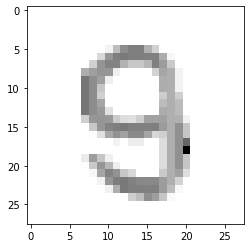

In [48]:
for i in range(len(predictions)):
    if np.argmax(predictions[i])!=y_test[i]:
        print(np.argmax(predictions[i]))
        plt.imshow(x_test[i],cmap=plt.cm.binary)
        break

In [49]:
print(np.argmax(predictions[2344]))

7


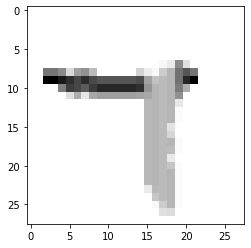

In [50]:
plt.imshow(x_test[2344],cmap=plt.cm.binary)